## Yol Haritası: Satış Verilerinin Analizi

Veri analizi görevini başarılı bir şekilde tamamlamak için adım adım bir yol haritası oluşturuyorum. Bu yol haritası, verilerin incelenmesi, analiz yöntemlerinin belirlenmesi, satış trendlerinin analizi ve anlamlı ilişkilerin bulunması gibi görevlerin detaylarını içerecektir.

### Adım 1: Verilerin İncelenmesi
- **Amaç**: Verilerin genel yapısını ve özelliklerini anlamak.
- **Yapılacaklar**:
  - **Veri Keşfi (Exploratory Data Analysis - EDA)**:
    - Tabloların ve sütunların incelenmesi.
    - Temel istatistiklerin çıkarılması (ortalama, medyan, standart sapma vb.).
    - Kategorik değişkenlerin dağılımlarının incelenmesi.
    - Sayısal değişkenlerin dağılımlarının incelenmesi.
    - Eksik veri ve aykırı değerlerin tespiti.
  - **Sorguların Yazılması**:
    - Örnek veri çekmek için SQL sorguları yazma.
    - Veri örneklerini inceleyerek verinin yapısını anlama.

### Adım 2: Analiz Yöntemlerinin Belirlenmesi
- **Amaç**: Hangi analiz yöntemlerinin kullanılacağına karar vermek.
- **Yapılacaklar**:
  - **Hedeflerin Belirlenmesi**:
    - İş sorularını ve hedefleri netleştirme (Örneğin, satış trendlerini belirleme, müşteri segmentasyon analizi vb.).
  - **Analiz Yöntemleri**:
    - Tanımlayıcı istatistikler.
    - Zaman serisi analizi.
    - Korelasyon analizi.
    - Regresyon analizi.
    - Kümeleme (Clustering) ve sınıflandırma (Classification) yöntemleri.

### Adım 3: Satış Trendlerinin Analizi
- **Amaç**: Satışların zaman içindeki eğilimlerini anlamak.
- **Yapılacaklar**:
  - **Zaman Serisi Analizi**:
    - Satış verilerinin zaman serisi olarak görselleştirilmesi.
    - Mevsimsellik ve trendlerin analizi.
    - Hareketli ortalamaların kullanılması.
  - **Dönemsel Analiz**:
    - Çeyrek bazında (QTR_ID) ve yıl bazında (YEAR_ID) satışların analizi.
    - Ay bazında (MONTH_ID) satışların karşılaştırılması.
  - **KPI (Key Performance Indicators) Belirleme**:
    - Ortalama satış miktarı.
    - Toplam satış geliri.
    - En çok satan ürünler ve kategoriler.

### Adım 4: Anlamlı İlişkilerin ve Korelasyonların Bulunması
- **Amaç**: Veriler arasındaki anlamlı ilişkileri ve korelasyonları tespit etmek.
- **Yapılacaklar**:
  - **Korelasyon Analizi**:
    - Satışlar ile fiyat, miktar, müşteri segmenti arasındaki ilişkilerin analizi.
    - Korelasyon matrislerinin oluşturulması.
  - **Regresyon Analizi**:
    - Satışları etkileyen faktörlerin belirlenmesi.
    - Regresyon modelleri ile satış tahminlerinin yapılması.
  - **Segmentasyon ve Kümeleme**:
    - Müşteri segmentlerinin belirlenmesi.
    - Kümeleme algoritmaları kullanarak müşteri gruplarının oluşturulması.

---

### ADIM 1: Verilerin İncelenmesi

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('../Database/customers.csv', sep=',', encoding='Latin-1')
products = pd.read_csv('../Database/products.csv', sep=',', encoding='Latin-1')
orders = pd.read_csv('../Database/orders.csv', sep=',', encoding='Latin-1')
order_items = pd.read_csv('../Database/order_items.csv', sep=',', encoding='Latin-1')

In [2]:
print("="*50)
print(customers.describe())
print("="*50)
print(products.describe())
print("="*50)
print(orders.describe())
print("="*50)
print(order_items.describe())
print("="*50)

              PHONE        id
count  9.200000e+01  92.00000
mean   2.641490e+10  46.50000
std    1.105878e+11  26.70206
min    2.555467e+06   1.00000
25%    6.522356e+08  23.75000
50%    2.125558e+09  46.50000
75%    6.175558e+09  69.25000
max    8.106634e+11  92.00000
             MSRP
count  109.000000
mean    99.899083
std     39.824603
min     33.000000
25%     68.000000
50%     97.000000
75%    122.000000
max    214.000000
        ORDERNUMBER      QTR_ID  customer_id
count    698.000000  698.000000   698.000000
mean   10261.785100    2.656160    40.818052
std       92.866914    1.197486    25.324009
min    10100.000000    1.000000     1.000000
25%    10183.000000    2.000000    21.000000
50%    10263.000000    3.000000    39.500000
75%    10339.750000    4.000000    62.000000
max    10425.000000    4.000000    92.000000
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115    

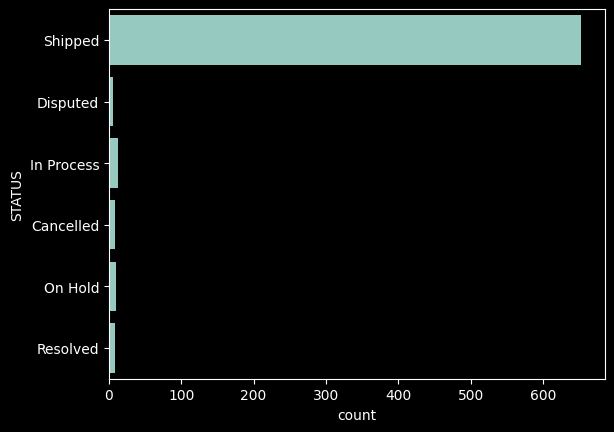

In [3]:
sns.countplot(y='STATUS', data=orders)
plt.show()

### Adım 2: Analiz Yöntemlerinin Belirlenmesi

1. **Hedeflerin Belirlenmesi**:
    - Satış trendlerini analiz etme.
    - Müşteri segmentasyon analizi.

2. **Analiz Yöntemleri**:
    - Zaman serisi analizi ile satış trendlerinin belirlenmesi.
    - Korelasyon ve regresyon analizleri ile satışları etkileyen faktörlerin belirlenmesi.
    - Kümeleme yöntemleri ile müşteri segmentasyon analizi.

### Adım 3: Satış Trendlerinin Analizi

In [4]:
orders.head()

,ORDERNUMBER,ORDERDATE,STATUS,QTR_ID,DEALSIZE,customer_id
0,10107,2003-02-24,Shipped,1,Small,1
1,10121,2003-05-07,Shipped,2,Small,2
2,10134,2003-07-01,Shipped,3,Medium,3
3,10145,2003-08-25,Shipped,3,Medium,4
4,10159,2003-10-10,Shipped,4,Medium,5


### Satış Trendlerini Belirleme

In [5]:
# Zaman serisi görselleştirme
orders['ORDERDATE'] = pd.to_datetime(orders['ORDERDATE'])
temp = orders.merge(order_items, on=['ORDERNUMBER'], how='left')
temp.head(3)

,ORDERNUMBER,ORDERDATE,STATUS,QTR_ID,DEALSIZE,customer_id,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES
0,10107,2003-02-24,Shipped,1,Small,1,S10_1678,30,95.70,2,2871.00
1,10107,2003-02-24,Shipped,1,Small,1,S10_2016,39,99.91,5,3896.49
2,10107,2003-02-24,Shipped,1,Small,1,S10_4698,27,100.00,4,2700.00


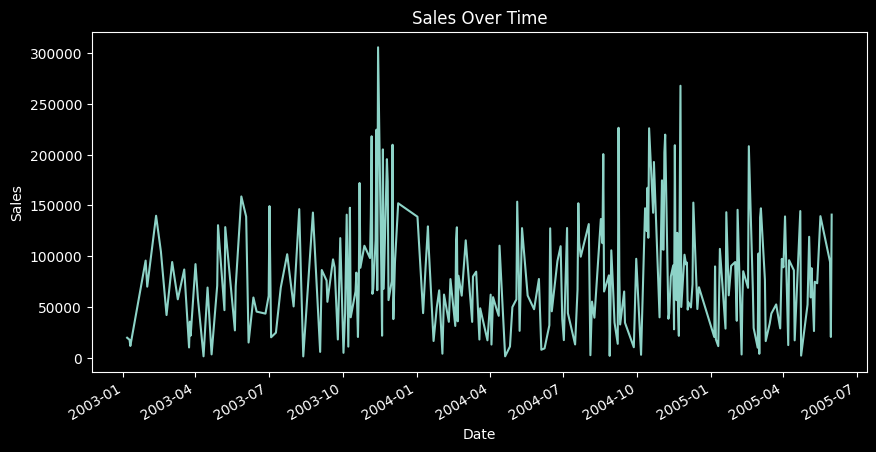

In [6]:
sales_by_date = temp.groupby('ORDERDATE')['SALES'].sum()

plt.figure(figsize=(10, 5))
sales_by_date.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Dönemsel Analiz

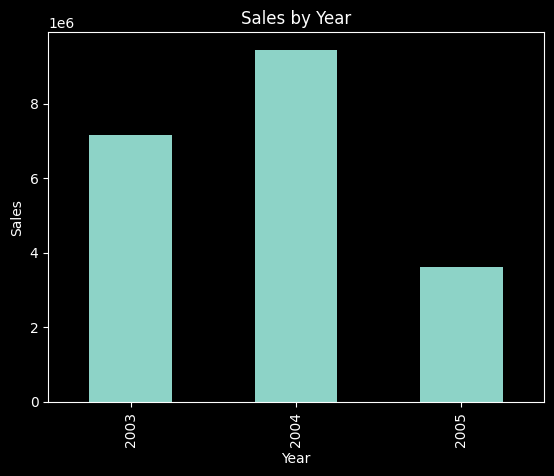

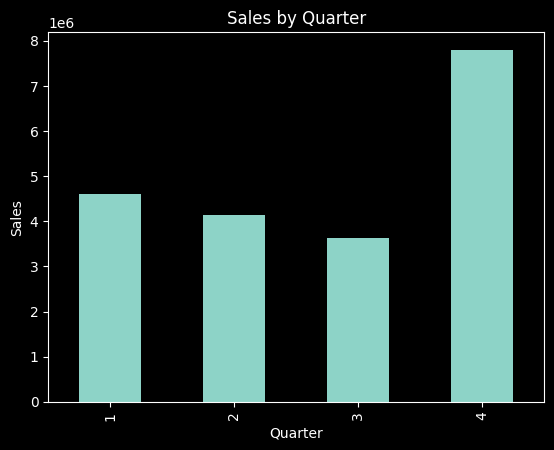

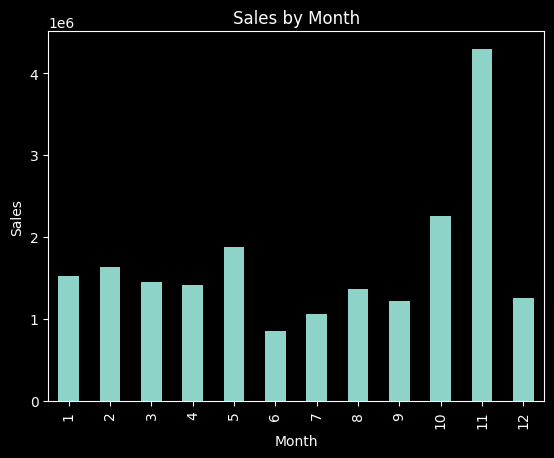

In [7]:
# Yıl, çeyreklik ve ay bazında analiz
temp['YEAR_ID'] = temp['ORDERDATE'].dt.year
temp['QTR_ID'] = temp['ORDERDATE'].dt.quarter
temp['MONTH_ID'] = temp['ORDERDATE'].dt.month

sales_by_quarter = temp.groupby('QTR_ID')['SALES'].sum()
sales_by_year = temp.groupby('YEAR_ID')['SALES'].sum()
sales_by_month = temp.groupby('MONTH_ID')['SALES'].sum()

sales_by_year.plot(kind='bar')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

sales_by_quarter.plot(kind='bar')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### KPI'ların Belirlenmesi

In [8]:
print("-"*21,"KPI's", "-"*21)
print('='*50)
# Ortalama satış miktarı
avg_sales = temp['SALES'].mean()
print(f'Average Sales: {avg_sales:.2f}')
print('='*50)

# Toplam satış geliri
total_sales = temp['SALES'].sum()
print(f'Total Sales: {total_sales:.2f}')
print('='*50)

# En çok satan ürünler ve kategoriler
temp2 = order_items.merge(products, on=['PRODUCTCODE'], how='left')
top_products = temp2.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
print(f'Top Products:\n{top_products}')
print('='*50)

--------------------- KPI's ---------------------
Average Sales: 2953.92
Total Sales: 20190049.29
Top Products:
PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1644212.05
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Ships                677940.40
Trains               203804.26
Name: SALES, dtype: float64


### Adım 4: Anlamlı İlişkilerin ve Korelasyonların Bulunması

In [9]:
dealsize_map = {'Small': 1, 'Medium': 2, 'Large': 3}
orders['DEALSIZEMAPPED'] = orders['DEALSIZE'].map(dealsize_map)
temp3 = orders[['ORDERNUMBER', 'DEALSIZEMAPPED']].merge(order_items[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']], on=['ORDERNUMBER'], how='left')

### Korelasyon Analizi

In [10]:
# Korelasyon matrisi

import numpy as np
correlation_matrix = temp3.corr()
correlation_matrix = np.round(correlation_matrix, decimals=2)
correlation_matrix

,ORDERNUMBER,DEALSIZEMAPPED,QUANTITYORDERED,PRICEEACH,SALES
ORDERNUMBER,1.00,-0.01,0.07,-0.00,0.06
DEALSIZEMAPPED,-0.01,1.00,0.03,0.02,0.04
QUANTITYORDERED,0.07,0.03,1.00,0.02,0.76
PRICEEACH,-0.00,0.02,0.02,1.00,0.65
SALES,0.06,0.04,0.76,0.65,1.00


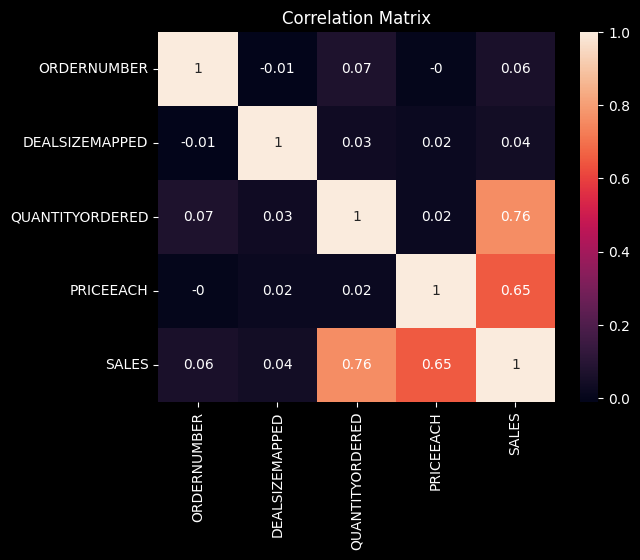

In [11]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Regresyon Analizi

In [12]:
temp3.head()

,ORDERNUMBER,DEALSIZEMAPPED,QUANTITYORDERED,PRICEEACH,SALES
0,10107,1,30,95.70,2871.00
1,10107,1,39,99.91,3896.49
2,10107,1,27,100.00,2700.00
3,10107,1,21,100.00,2100.00
4,10107,1,29,70.87,2055.23


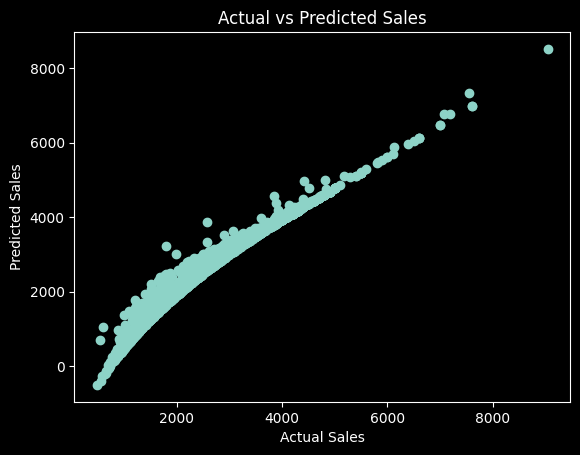

In [13]:
from sklearn.linear_model import LinearRegression

# Verilerin hazırlanması
X = order_items[['PRICEEACH', 'QUANTITYORDERED']]
y = order_items['SALES']

# Regresyon modeli
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Model değerlendirme
plt.scatter(y, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

### Müşteri Segmentasyonu

In [14]:
# Verilerin hazırlanması
temp4 = customers[['CUSTOMERNAME', 'id']].merge(orders[['ORDERNUMBER', 'DEALSIZEMAPPED', 'customer_id']], left_on=['id'], right_on=['customer_id'], how='left')
temp4 = temp4.merge(order_items, on=['ORDERNUMBER'], how='left')
temp4.head()

,CUSTOMERNAME,id,ORDERNUMBER,DEALSIZEMAPPED,customer_id,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES
0,Land of Toys Inc.,1,10107,1,1,S10_1678,30,95.70,2,2871.00
1,Land of Toys Inc.,1,10107,1,1,S10_2016,39,99.91,5,3896.49
2,Land of Toys Inc.,1,10107,1,1,S10_4698,27,100.00,4,2700.00
3,Land of Toys Inc.,1,10107,1,1,S12_2823,21,100.00,1,2100.00
4,Land of Toys Inc.,1,10107,1,1,S18_2625,29,70.87,6,2055.23


In [28]:
temp4 = temp4.groupby('CUSTOMERNAME').agg({'SALES': 'sum'}).reset_index()
temp4.head()

,CUSTOMERNAME,SALES
0,"AV Stores, Co.",318646.72
1,Alpha Cognac,117770.56
2,Amica Models & Co.,217935.03
3,"Anna's Decorations, Ltd",290062.11
4,Atelier graphique,40114.64


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(temp4[['SALES']])

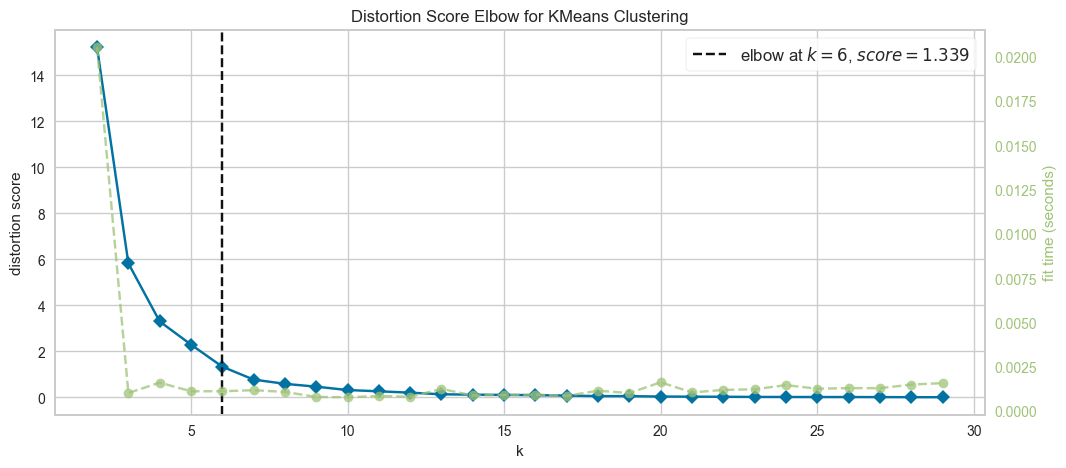

Kümeleme Analizi 0:0 Dakikada Tamamlandı.


In [31]:
import time
start = time.time()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

plt.figure(figsize=(12, 5))

visualizer = KElbowVisualizer(kmeans, k=(2, 30), locate_elbow=True)
visualizer.fit(scaled_data)
visualizer.show()

end = time.time()
elapsed_time = end - start
print(f"Kümeleme Analizi {int(elapsed_time//60)}:{int(elapsed_time%60)} Dakikada Tamamlandı.")

In [32]:
from sklearn.cluster import KMeans

# Kümeleme modeli
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)
temp4['Cluster'] = kmeans.labels_

temp4.head()

,CUSTOMERNAME,SALES,Cluster
0,"AV Stores, Co.",318646.72,3
1,Alpha Cognac,117770.56,2
2,Amica Models & Co.,217935.03,0
3,"Anna's Decorations, Ltd",290062.11,3
4,Atelier graphique,40114.64,2


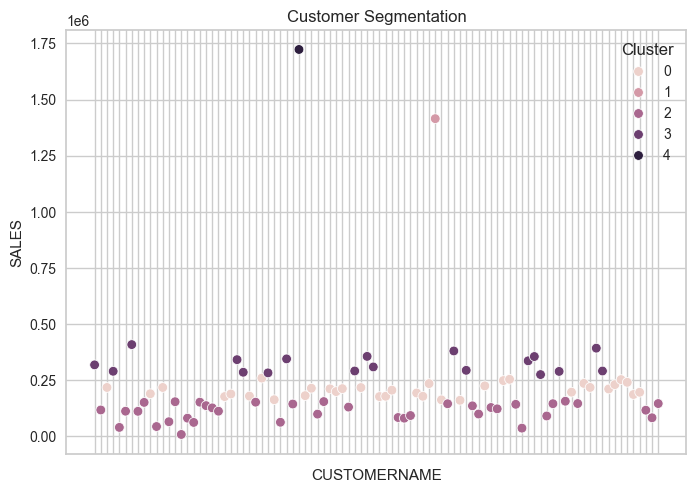

In [37]:
# Scatter Plot
sns.scatterplot(data=temp4, x='CUSTOMERNAME', y='SALES', hue='Cluster')
plt.title('Customer Segmentation')

# X ekseni etiketlerini gizleme
plt.gca().set_xticklabels([])

plt.show()

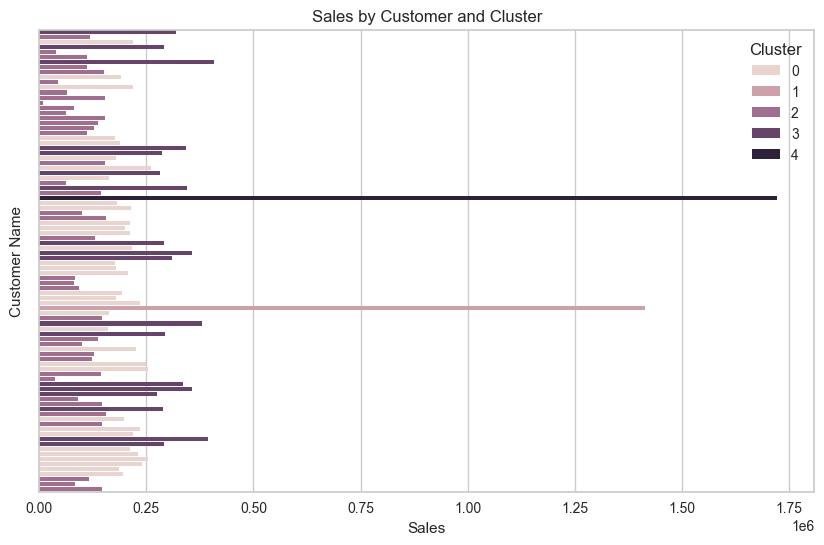

In [36]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=temp4, x='SALES', y='CUSTOMERNAME', hue='Cluster', dodge=False)
plt.title('Sales by Customer and Cluster')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.legend(title='Cluster')

# X ekseni etiketlerini gizleme
plt.gca().set_yticklabels([])

plt.show()

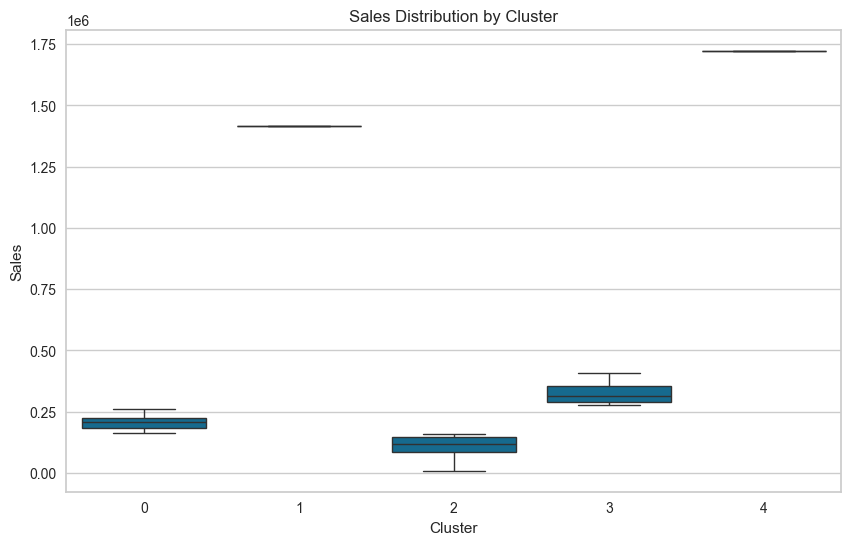

In [38]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=temp4, x='Cluster', y='SALES')
plt.title('Sales Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()

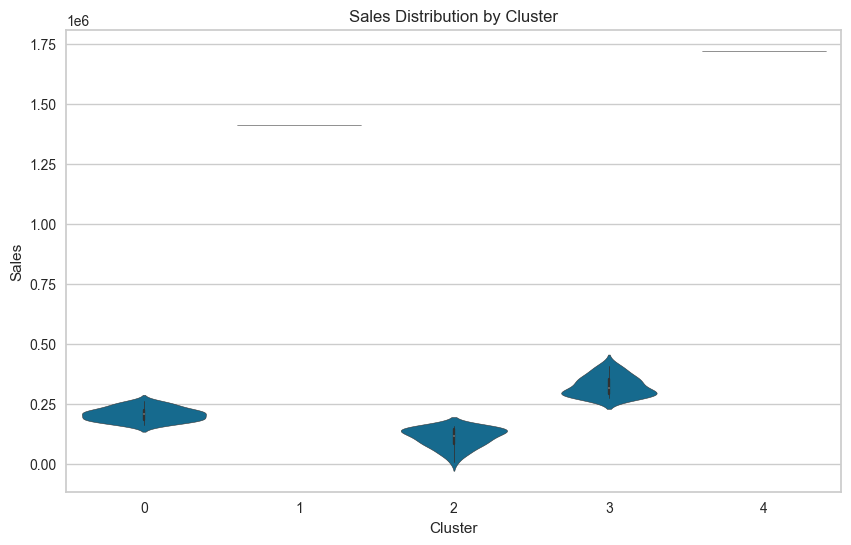

In [39]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=temp4, x='Cluster', y='SALES')
plt.title('Sales Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()

/var/folders/pc/qcs13wm520n7k8hkn2_m0hl40000gn/T/ipykernel_70784/520947960.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


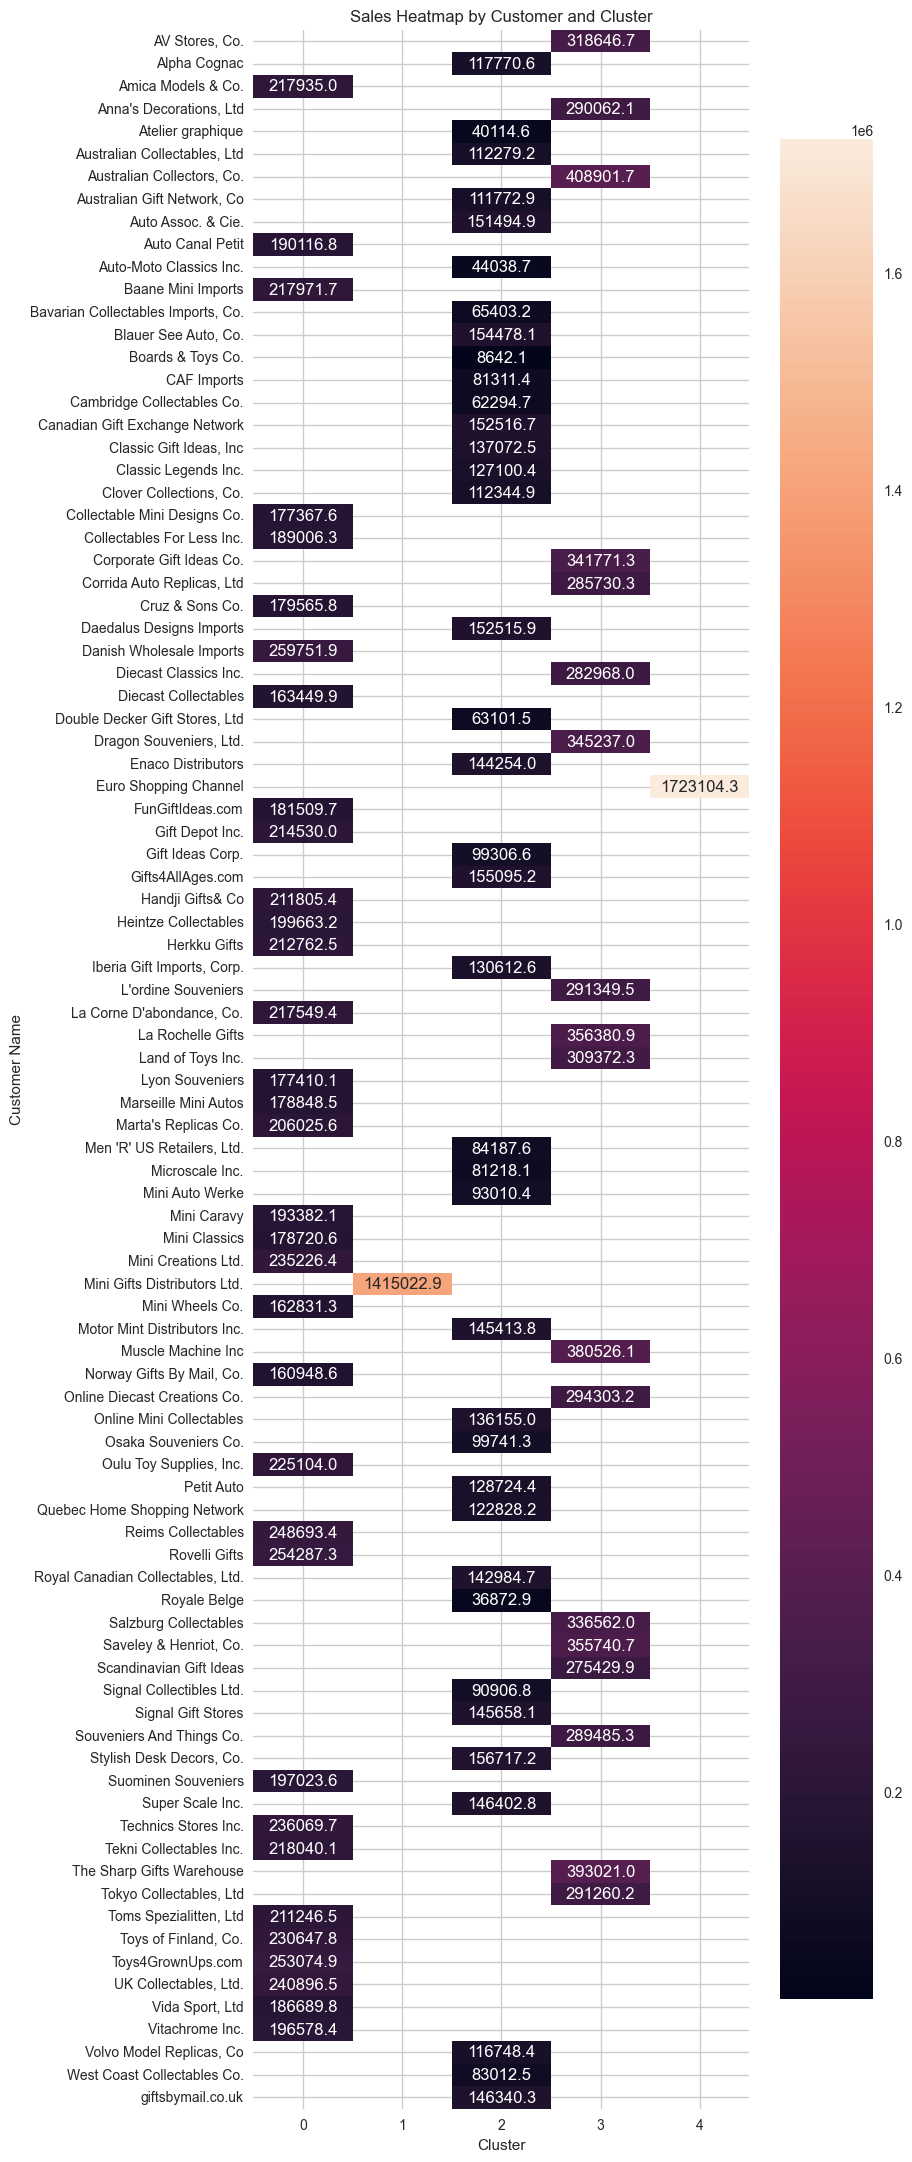

In [56]:
# Pivot table oluşturma
pivot = temp4.pivot(index="CUSTOMERNAME", columns="Cluster", values="SALES")

# Heatmap
plt.figure(figsize=(8, 27))
sns.heatmap(pivot, annot=True, fmt=".1f")
plt.title('Sales Heatmap by Customer and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Name')
plt.legend()
plt.show()

/Users/ramazanerduran/GitHub/Sales-End-to-End-ML-Project/env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


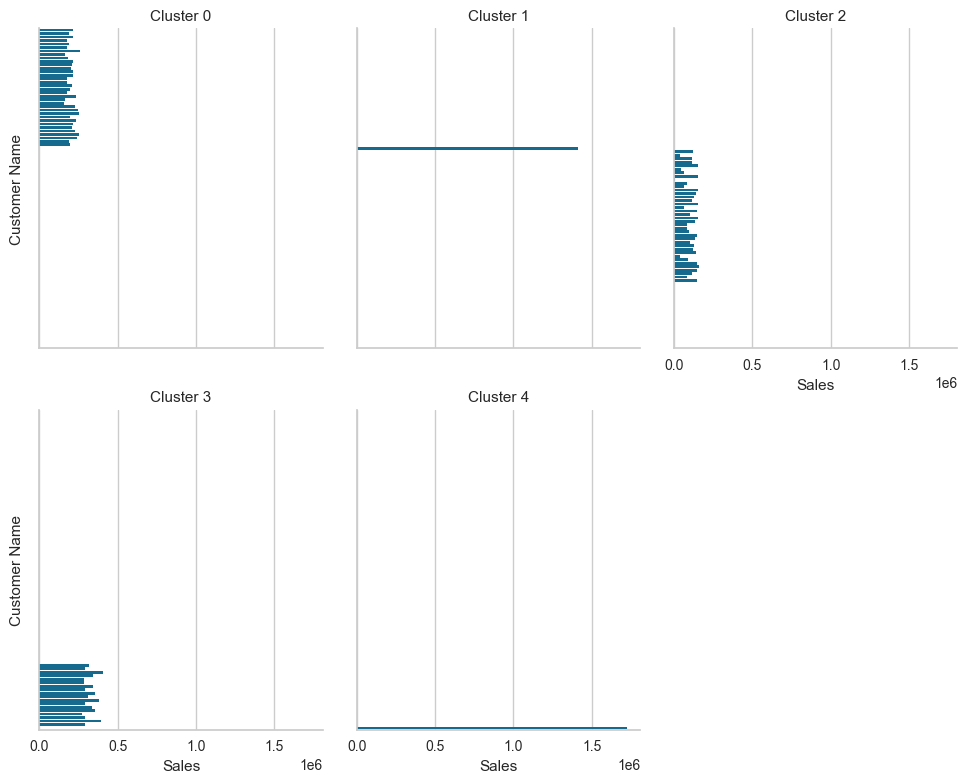

In [49]:
# Facet Grid
g = sns.FacetGrid(temp4, col='Cluster', col_wrap=3, height=4)
g.map(sns.barplot, 'SALES', 'CUSTOMERNAME')
g.set_titles('Cluster {col_name}')
g.set_axis_labels('Sales', 'Customer Name')

# X ekseni etiketlerini gizleme
for ax in g.axes.flatten():
    ax.set_yticklabels([])
    
plt.show()